In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('tenzosensor.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df_0 = df
df


,T_env(C),P_atm(мм.рт.ст.),Humidity(%),P_measured(МПа)
0,20.23,756.5,57.9,0.577
1,19.38,762.8,56.8,0.575
2,27.03,755.7,62.2,0.691
3,18.97,761.0,52.6,0.580
4,19.86,761.5,53.7,0.592
...,...,...,...,...
115,19.96,775.1,54.1,0.605
116,21.13,758.3,53.4,0.626
117,21.24,758.4,62.3,0.571
118,20.63,762.8,57.7,0.583


In [3]:
for i in df.columns:
    V = df[i].std()/df[i].mean()*100
    if (i != 'P_measured(МПа)'):
        if V < 33:
            print('Выборка ', i, ' однородная, V =', round(V,3), '%')
        else:
            print('Выборка ', i, 'не однородная, V =', round(V,3), '%')


Выборка  T_env(C)  однородная, V = 8.843 %
Выборка  P_atm(мм.рт.ст.)  однородная, V = 0.633 %
Выборка  Humidity(%)  однородная, V = 6.815 %


Text(0.5, 1.0, 'Атмосферное давление (мм.рт.ст.)')

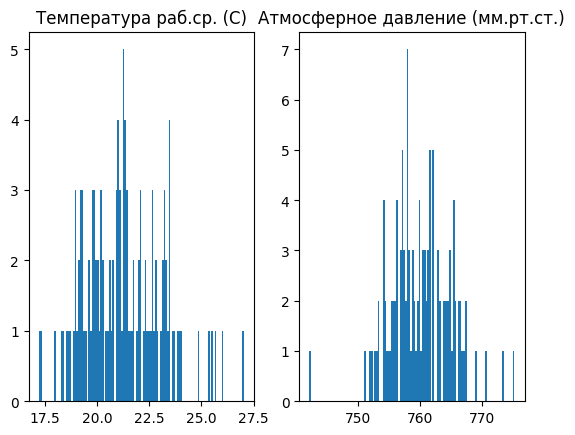

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
n_bins = len(df)
axs[0].hist(df['T_env(C)'], bins=n_bins)
axs[0].set_title('Температура раб.ср. (C)')
axs[1].hist(df['P_atm(мм.рт.ст.)'], bins=n_bins)
axs[1].set_title('Атмосферное давление (мм.рт.ст.)')


Text(0.5, 1.0, 'Измеренное давление (МПа)')

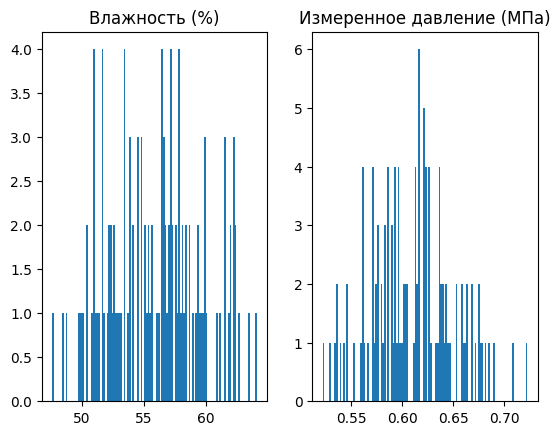

In [5]:
fig, axs = plt.subplots(1, 2)
n_bins = len(df)
axs[0].hist(df['Humidity(%)'], bins=n_bins)
axs[0].set_title('Влажность (%)')
axs[1].hist(df['P_measured(МПа)'], bins=n_bins)
axs[1].set_title('Измеренное давление (МПа)')

/var/folders/mq/gws6wqb95z71y_3hmhkd83h40000gn/T/ipykernel_8929/1119347313.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['Humidity(%)'])


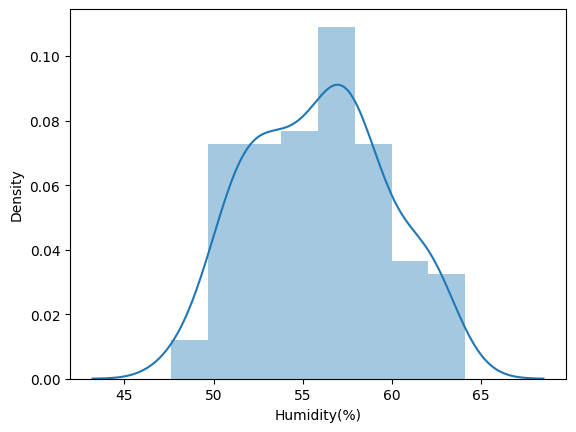

In [6]:
import seaborn as sns

sns_plot = sns.distplot(df['Humidity(%)'])
fig = sns_plot.get_figure()

/var/folders/mq/gws6wqb95z71y_3hmhkd83h40000gn/T/ipykernel_8929/1247266407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['T_env(C)'])


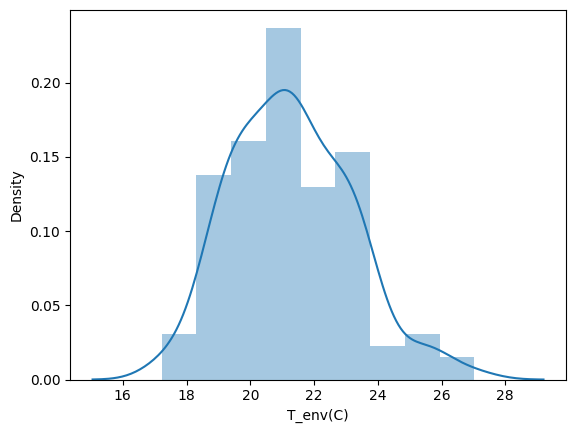

In [7]:
sns_plot = sns.distplot(df['T_env(C)'])
fig = sns_plot.get_figure()

/var/folders/mq/gws6wqb95z71y_3hmhkd83h40000gn/T/ipykernel_8929/727330927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['P_atm(мм.рт.ст.)'])


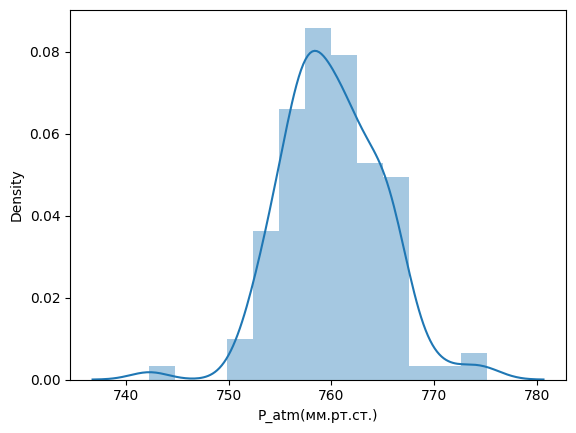

In [8]:
sns_plot = sns.distplot(df['P_atm(мм.рт.ст.)'])
fig = sns_plot.get_figure()

/var/folders/mq/gws6wqb95z71y_3hmhkd83h40000gn/T/ipykernel_8929/3321494977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['P_measured(МПа)'])


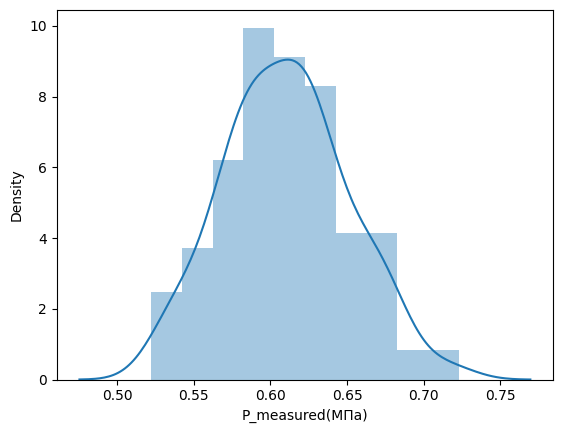

In [9]:
sns_plot = sns.distplot(df['P_measured(МПа)'])
fig = sns_plot.get_figure()

In [10]:
import scipy.stats as st

for i in df.columns:
    statistic, p_value = st.shapiro(df[i])
    print('statistic = %.3f, p = %.3f' % (statistic, p_value))
    if 0.05 < p_value:
        print(f"Можно принять гипотезу о нормальном распределении выборки {i}\n")
    else:
        print(
            f"Нельзя принять гипотезу о нормальном распределении выборки {i}\n")

statistic = 0.984, p = 0.152
Можно принять гипотезу о нормальном распределении выборки T_env(C)

statistic = 0.980, p = 0.069
Можно принять гипотезу о нормальном распределении выборки P_atm(мм.рт.ст.)

statistic = 0.982, p = 0.107
Можно принять гипотезу о нормальном распределении выборки Humidity(%)

statistic = 0.992, p = 0.757
Можно принять гипотезу о нормальном распределении выборки P_measured(МПа)



Text(0.5, 1.0, 'Температура')

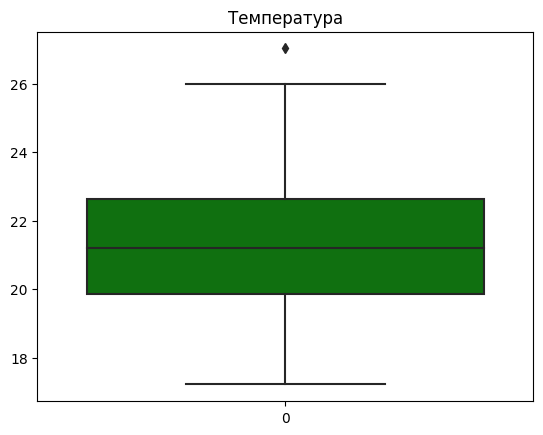

In [11]:
sns.boxplot(data=df['T_env(C)'], color= 'g').set_title('Температура')

Text(0.5, 1.0, 'Атмосферное давление')

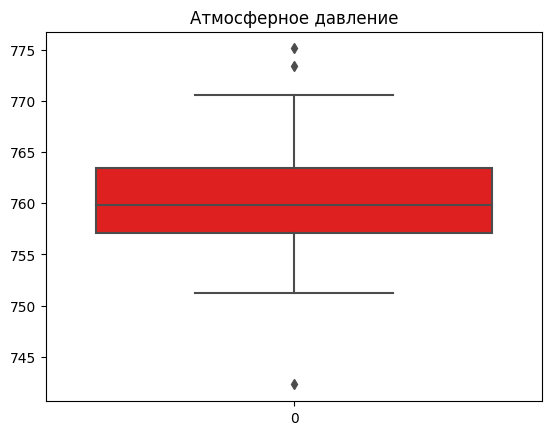

In [12]:
sns.boxplot(data=df['P_atm(мм.рт.ст.)'], color= 'r').set_title('Атмосферное давление')

Text(0.5, 1.0, 'Влажность')

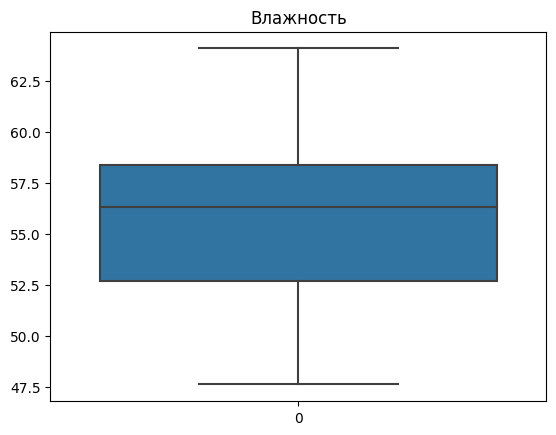

In [13]:
sns.boxplot(data=df['Humidity(%)']).set_title('Влажность')

In [14]:
df_0 = df
for col in df.columns:
    s = df[col].std(ddof=True)
    x_ = df[col].mean()
    if_ = (df[col] < (x_ - 3*s)) | (df[col] > (x_ + 3*s))
    df_0.drop(df_0[if_].index, axis=0, inplace=True)
df_0


,T_env(C),P_atm(мм.рт.ст.),Humidity(%),P_measured(МПа)
0,20.23,756.5,57.9,0.577
1,19.38,762.8,56.8,0.575
3,18.97,761.0,52.6,0.580
4,19.86,761.5,53.7,0.592
5,18.97,770.6,55.1,0.583
...,...,...,...,...
114,21.98,759.1,54.8,0.621
116,21.13,758.3,53.4,0.626
117,21.24,758.4,62.3,0.571
118,20.63,762.8,57.7,0.583


In [15]:
df = df_0.copy()
df = df.drop(['P_measured(МПа)'], axis=1)
df
df.corr()

,T_env(C),P_atm(мм.рт.ст.),Humidity(%)
T_env(C),1.000000,-0.162463,0.039227
P_atm(мм.рт.ст.),-0.162463,1.000000,-0.090831
Humidity(%),0.039227,-0.090831,1.000000


In [16]:
df_corr = df_0.corr()
R   = np.sqrt(1-np.linalg.det(df_corr)/(1+2*df_corr['T_env(C)']['P_atm(мм.рт.ст.)']\
        *df_corr['T_env(C)']['Humidity(%)']*df_corr['P_atm(мм.рт.ст.)']['Humidity(%)'] \
        - df_corr['T_env(C)']['Humidity(%)']**2 - df_corr['P_atm(мм.рт.ст.)']['Humidity(%)']**2 \
            - df_corr['T_env(C)']['P_atm(мм.рт.ст.)']**2))
R


0.9929929142740721

In [17]:
X = np.array(df)
X_ = np.column_stack(([1 for _ in range(len(df))],
                     X))
Y = np.array(df_0["P_measured(МПа)"])

In [18]:
b_MNK = np.dot(np.dot(
    np.linalg.inv(np.dot(X_.T, X_)),
    X_.T), Y)
Y_pred = np.dot(X_, b_MNK)
print("Оценки коэффициентов уравнения регрессии:")
print(b_MNK)

Оценки коэффициентов уравнения регрессии:
[-0.01912859  0.0193978   0.00068272 -0.00541294]


In [19]:
# def mse(b0, b1, b2, b3, x1, x2, x3, y):
#     return np.sum(((b0+b1*x1+b2*x2+b3*x3)-y)**2)/len(x1)

# def deriv_mse_b0(b0, b1, b2, b3, x1, x2, x3, y):
#     return 2*np.sum((b0+b1*x1+b2*x2+b3*x3)-y)/len(x1)

# def deriv_mse_b1(b0, b1, b2, b3, x1, x2, x3, y):
#     return 2*np.sum(((b0+b1*x1+b2*x2+b3*x3)-y)*x1)/len(x1)

# def deriv_mse_b2(b0, b1, b2, b3, x1, x2, x3, y):
#     return 2*np.sum(((b0+b1*x1+b2*x2+b3*x3)-y)*x2)/len(x1)

# def deriv_mse_b3(b0, b1, b2, b3, x1, x2, x3, y):
#     return 2*np.sum(((b0+b1*x1+b2*x2+b3*x3)-y)*x3)/len(x1)


# print('Метод градиентного спуска')
# x1 = df_0['T_env(C)']
# x2 = df_0['P_atm(мм.рт.ст.)']
# x3 = df_0['Humidity(%)']
# y = df_0['P_measured(МПа)']
# alpha = 1e-06
# b0 = -0.01
# b1 = 0.01
# b2 = 0.0005
# b3 = -0.005
# mse_min = mse(b0, b1, b2, b3, x1, x2, x3, y)
# i_min = 1
# b0_min = b0
# b1_min = b1
# b2_min = b2
# b3_min = b3

# for i in range(1000000):
#     b0 -= alpha*deriv_mse_b0(b0, b1, b2, b3, x1, x2, x3, y)
#     b1 -= alpha*deriv_mse_b1(b0, b1, b2, b3, x1, x2, x3, y)
#     b2 -= alpha*deriv_mse_b2(b0, b1, b2, b3, x1, x2, x3, y)
#     b3 -= alpha*deriv_mse_b3(b0, b1, b2, b3, x1, x2, x3, y)
#     if i % 10000 == 0:
#         print(f'{i}. b0 = {b0}, b1 = {b1}, b2 = {b2}, b3 = {b3}, mse = {mse(b0, b1, b2, b3, x1, x2, x3, y)}')
#     if mse(b0, b1, b2, b3, x1, x2, x3, y) > mse_min:
#         print(
#             f'{i_min}. b0 = {b0_min}, b1 = {b1_min}, b2 = {b2_min}, b3 = {b3_min}, mse = {mse_min}')
#         break
#     else:
#         mse_min = mse(b0, b1, b2, b3, x1, x2, x3, y)
#         i_min = i
#         b0_min = b0
#         b1_min = b1
#         b2_min = b2
#         b3_min = b3
# print(f'Минимум был достигнут на итерации {i_min} со значением b0 = {b0_min}, b1 = {b1_min}, b2 = {b2_min}, b3 = {b3_min}, mse = {mse_min}')


In [20]:
from scipy.stats import t

S2_y = np.sum(Y-Y.mean())**2/len(Y)
S_ai = S2_y/3
for i in b_MNK:
    t_ras = abs(i)/(S_ai**0.5)
    if (t_ras > t.ppf(1-0.05/2, len(Y)-3-1)):
        print('Коэффициент ', i, 'статистически значим')
    else:
        print('Коэффициент ', i, 'статистически не значим')

Коэффициент  -0.019128591329017525 статистически значим
Коэффициент  0.019397804213755105 статистически значим
Коэффициент  0.0006827165379464648 статистически значим
Коэффициент  -0.005412939421777418 статистически значим


In [21]:
Y_pred = X_@b_MNK
delta = (Y - Y_pred)/Y*100
delta.max()


2.2526615827300582

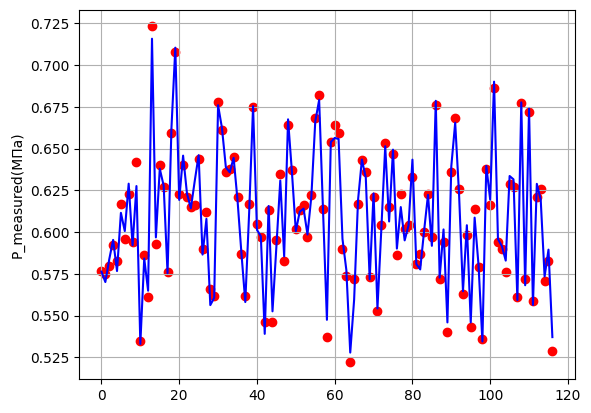

In [22]:
start = 0
end = np.shape(X_)[0]
x = [i for i in range(start, end)]
plt.scatter(x[::], Y[start:end][::], c='red')
plt.plot(x[::], Y_pred[start:end][::], c='blue')
plt.ylabel('P_measured(МПа)')
plt.grid()

In [23]:
import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = df_0['P_measured(МПа)']

#Make Plotly figure
fig1 = go.Scatter3d(x=df_0['T_env(C)'],
                    y=df_0['P_atm(мм.рт.ст.)'],
                    z=df_0['Humidity(%)'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="T_env(C)"),
                                yaxis=dict( title="P_atm(мм.рт.ст.)"),
                                zaxis=dict(title="Humidity(%)")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))


'4DPlot.html'

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_0.drop('P_measured(МПа)',axis= 1)
y = df_0['P_measured(МПа)']

# созданем тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# создаем регрессионную модель
model = LinearRegression()

# прогоняем модель по тренировочной выборке
model.fit(X_train,y_train)

# делаем предсказания
predictions = model.predict(X_test)

print(f'Интерсепт (b0) = {model.intercept_}')
print(pd.DataFrame(zip(X.columns, model.coef_)))

# оценка модели
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('R^2 : ', model.score(X_train, y_train))


Интерсепт (b0) = -0.06707618609631816
                  0         1
0          T_env(C)  0.019553
1  P_atm(мм.рт.ст.)  0.000743
2       Humidity(%) -0.005444
mean_squared_error :  2.2217582333642998e-05
mean_absolute_error :  0.0037136680252496577
R^2 :  0.9854982861944229


In [25]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

y = df_0['P_measured(МПа)']
x = df_0[['T_env(C)', 'Humidity(%)', 'P_atm(мм.рт.ст.)']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
white_test = het_white(model. resid , model. model.exog )

#проверка на гетероскедастичность 
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

                            OLS Regression Results                            
Dep. Variable:        P_measured(МПа)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2660.
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.33e-104
Time:                        02:55:09   Log-Likelihood:                 460.60
No. Observations:                 117   AIC:                            -913.2
Df Residuals:                     113   BIC:                            -902.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0191      0.081  

eval_env: 1


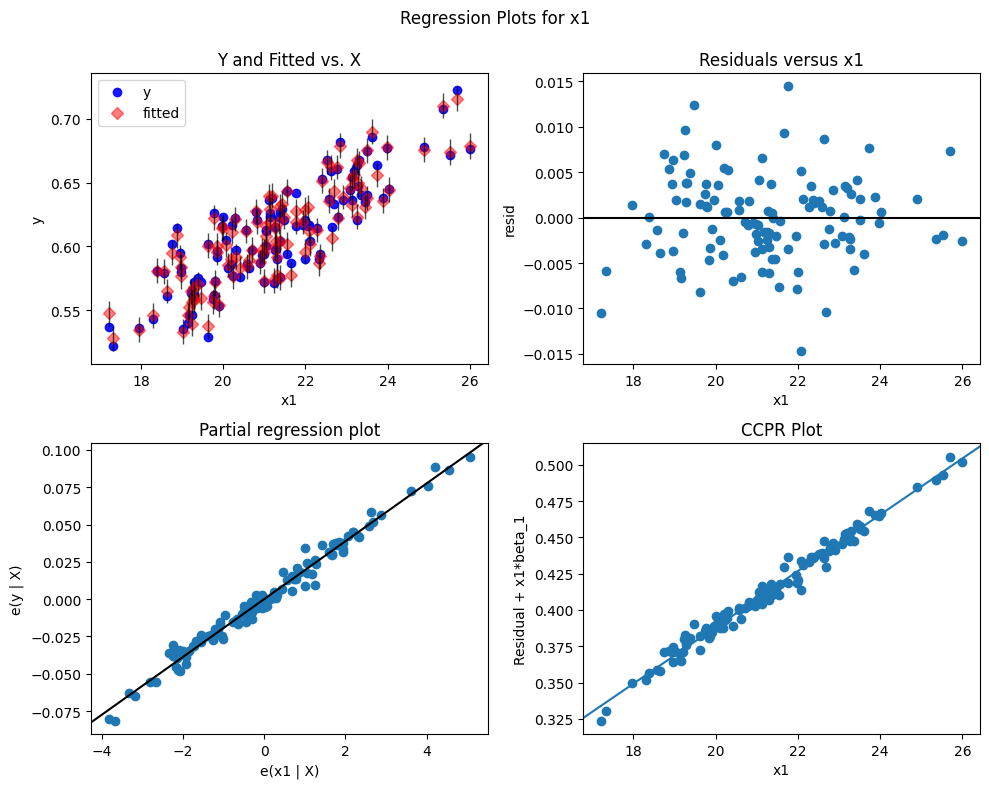

In [26]:
from statsmodels.formula.api import ols

df_1 = pd.DataFrame({'x1': df_0['T_env(C)'], 'x2': df_0['Humidity(%)'],'x3': df_0['P_atm(мм.рт.ст.)'],'y': df_0['P_measured(МПа)']})

model1 = ols('y ~ x1 + x2 + x3', data=df_1).fit()
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model1, 'x1', fig=fig)

eval_env: 1


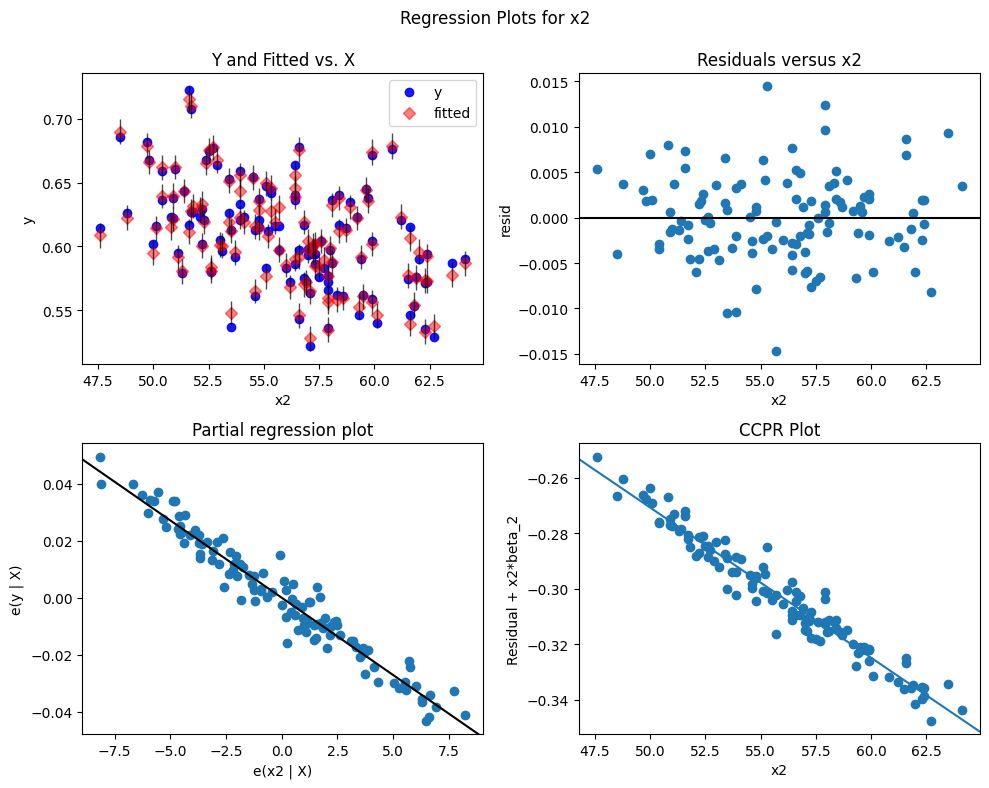

In [27]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model1, 'x2', fig=fig)

eval_env: 1


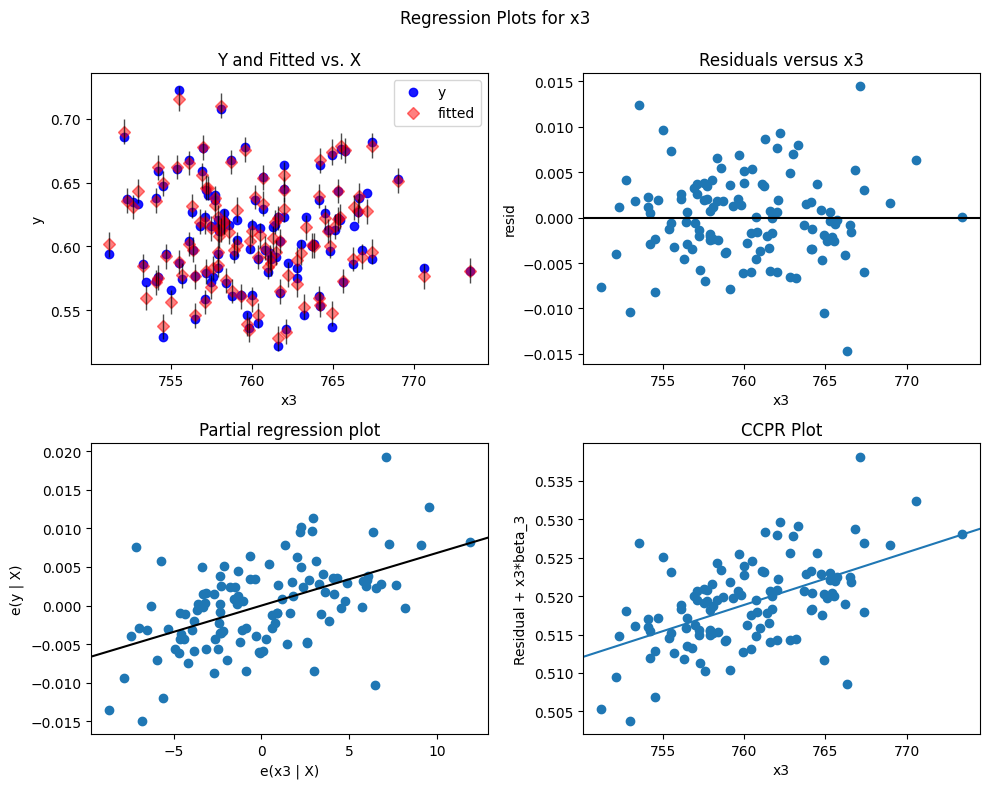

In [28]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model1, 'x3', fig=fig)